<a href="https://colab.research.google.com/github/harrypham2000/food_recognition_recommendation/blob/main/training_image%26ytesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive and authorize for the use of it

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#os.chdir("/content/gdrive/Othercomputers/MyLaptop/thesis2024")
%pwd
%ls
!nvidia-smi

images/  license_agreement.txt  meta/  README.txt  test/  train/
Mon Mar 25 18:28:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              39W / 300W |  15136MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+--

In [ ]:
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline
from collections import defaultdict
import collections

from shutil import copy
from shutil import copytree, rmtree

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from tensorflow.keras import regularizers

from tensorflow.keras import models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S, EfficientNetV2L

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import cv2

Load and extract dataset


In [ ]:
# Helper function to download data and extract
# %cd '/content/drive/Othercomputers/MyLaptop/thesis2024/data'
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [ ]:
# Download data and extract it to folder
# Uncomment this below line if you are on Colab
get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

Sorting dataset into folders


In [ ]:
data_dir='/content/food-101/images'
#data_dir='/content/drive/food-101/images'
foods_sorted = sorted(os.listdir(data_dir))

In [ ]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
 %cd food-101/
#%cd '/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101'

/content/food-101


In [ ]:
prepare_data('/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/meta/train.txt','/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/images','train')

KeyboardInterrupt: 

In [ ]:
prepare_data('/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/meta/test.txt','/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/images','test')

In [ ]:
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', 'train')



Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

In [ ]:
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', 'test')


Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying images into  croque_madam

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [ ]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [ ]:
K.clear_session()
num_classes = 101
img_width, img_height = 224, 224
train_dir = '/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/train'
val_dir = '/content/drive/Othercomputers/MyLaptop/thesis2024/data/food-101/test'
nb_train_samples = 75750
nb_validation_samples = 25250

In [ ]:
K.clear_session()
num_classes = 101
img_width, img_height = 224, 224
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/test'
nb_train_samples = 75750
nb_validation_samples = 25250


In [ ]:

BATCH_SIZE = 64
IMG_SIZE = (224, 224)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

base_model = EfficientNetV2S(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=AdamW(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(),
              metrics=SparseCategoricalAccuracy())

epoch = 40
history = model.fit(train_generator, validation_data=val_generator, epochs=epoch)

val_loss, val_acc = model.evaluate(val_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)



model.save("/content/drive/efficientnetv2_food101.keras")

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
Epoch 1/40
1184/1184 [==============================] - 1062s 835ms/step - loss: 2.2357 - sparse_categorical_accuracy: 0.4811 - val_loss: 0.8827 - val_sparse_categorical_accuracy: 0.7574
Epoch 2/40
1184/1184 [==============================] - 978s 826ms/step - loss: 1.0510 - sparse_categorical_accuracy: 0.7242 - val_loss: 0.7306 - val_sparse_categorical_accuracy: 0.7978
Epoch 3/40
1184/1184 [==============================] - 989s 835ms/step - loss: 0.7855 - sparse_categorical_accuracy: 0.7887 - val_loss: 0.5969 - val_sparse_categorical_accuracy: 0.8339
Epoch 4/40
1184/1184 [==============================] - 980s 828ms/step - loss: 0.6234 - sparse_categorical_accuracy: 0.8295 - val_loss: 1.8124 - val_sparse_categorical_accuracy: 0.5522
Epoch 5/40
1184/1184 [==============================] - 988s 834ms/step - loss: 0.5002 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.6181 - val_sparse_categori

OSError: [Errno 95] Operation not supported: '/content/drive/efficientnetv2_food101.keras'

In [32]:
model.save('/content/trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
from google.colab import files
files.download('/content/trained_food101.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
model2=load_model('/content/trained.h5')

In [78]:
image=load_and_preprocess_image('/test3.jpg')
prediction=model2.predict(image)
predicted=np.argmax(prediction)
print(predicted)


1/1 [==============================] - 3s 3s/step
67


In [35]:
model=load_model('/content/trained_food101.keras')

Load model and print specifications


In [31]:
import os

print(os.getcwd())

/content/food-101


In [ ]:
model_dir=('/content/trained_foood101.keras')


In [ ]:
model.save('/content/trained_food101.keras')

In [ ]:
#EfficientNetV2L = load_model('/content/gdrive/')
EfficientNetV2S = load_model('/content/trained_food101.keras')

In [36]:
def print_model_details(model):
    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]
    print("==========================================================")
    print("Model Name: ", namestr(model, globals()))
    print("Number of Layers: ", len(model.layers))
    print("Number of Parameters: ", format(model.count_params(), ',d'))
    print("==========================================================\n")


# print_model_details(EfficientNetV2L)

In [38]:
# Print training, test accuracy and loss of the model
def model_eval(model, train, val):
    # evaluate the model
    train_loss, train_acc = model.evaluate(train, verbose=1)
    val_loss, val_acc = model.evaluate(val, verbose=1)
    print('Train loss:', train_loss)
    print('Train accuracy:', train_acc)
    print('Validation loss:', val_loss)
    print('Validation accuracy:', val_acc)

In [ ]:
# model_eval(EfficientNetV2L, train_generator, val_generator)

In [ ]:
# Print training, test accuracy and loss of the model
def model_eval(model, train, val):
    # evaluate the model
    train_loss, train_acc = model.evaluate(train, verbose=1)
    val_loss, val_acc = model.evaluate(val, verbose=1)
    print('Train loss:', train_loss)
    print('Train accuracy:', train_acc)
    print('Validation loss:', val_loss)
    print('Validation accuracy:', val_acc)

In [37]:
print_model_details(model)

Model Name:  ['model']
Number of Layers:  3
Number of Parameters:  20,460,741



In [39]:
model_eval(model, train_generator, val_generator)

395/395 [==============================] - 81s 204ms/step - loss: 0.7582 - sparse_categorical_accuracy: 0.8550
Train loss: 0.011363418772816658
Train accuracy: 0.9965412616729736
Validation loss: 0.7581933736801147
Validation accuracy: 0.855009913444519


In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 101)               129381    
                                                                 
Total params: 20460741 (78.05 MB)
Trainable params: 20306869 (77.46 MB)
Non-trainable params: 153872 (601.06 KB)
_________________________________________________________________


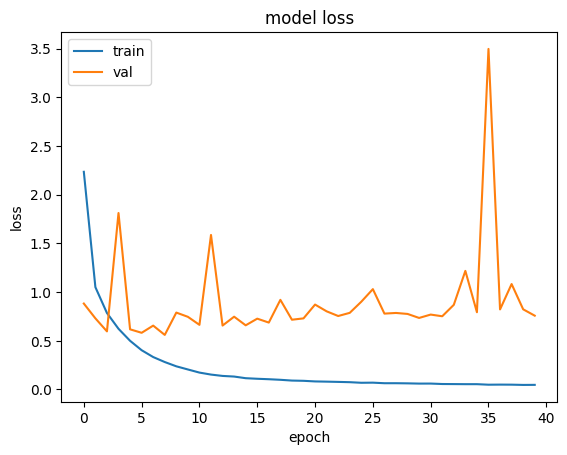

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
import keras
from keras.utils import plot_metrics

history=model.fit(train_generator,epochs=10,validation_data=val_generator)

plot_metrics(history, metrics=[ 'loss', 'accuracy'])
plot_metrics(history, metrics=[ 'f1' ])

ImportError: cannot import name 'plot_metrics' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/utils/__init__.py)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

y_pred = model.predict(val_generator)
y_true = val_generator.classes

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
pr_auc = average_precision_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

395/395 [==============================] - 82s 199ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
# Get the class indices from the train generator
class_indices=train_generator.class_indices
# Invert the dictionary to map indices to class names
class_names={v: k for k, v in class_indices.items()}
# Print the class names
print("Class Names:")
for idx, class_name in class_names.items():
    print(f"Class index: {idx}, Class name: {class_name}")

Class Names:
Class index: 0, Class name: apple_pie
Class index: 1, Class name: baby_back_ribs
Class index: 2, Class name: baklava
Class index: 3, Class name: beef_carpaccio
Class index: 4, Class name: beef_tartare
Class index: 5, Class name: beet_salad
Class index: 6, Class name: beignets
Class index: 7, Class name: bibimbap
Class index: 8, Class name: bread_pudding
Class index: 9, Class name: breakfast_burrito
Class index: 10, Class name: bruschetta
Class index: 11, Class name: caesar_salad
Class index: 12, Class name: cannoli
Class index: 13, Class name: caprese_salad
Class index: 14, Class name: carrot_cake
Class index: 15, Class name: ceviche
Class index: 16, Class name: cheese_plate
Class index: 17, Class name: cheesecake
Class index: 18, Class name: chicken_curry
Class index: 19, Class name: chicken_quesadilla
Class index: 20, Class name: chicken_wings
Class index: 21, Class name: chocolate_cake
Class index: 22, Class name: chocolate_mousse
Class index: 23, Class name: churros
Cl

In [ ]:
print(class_names)

{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito', 10: 'bruschetta', 11: 'caesar_salad', 12: 'cannoli', 13: 'caprese_salad', 14: 'carrot_cake', 15: 'ceviche', 16: 'cheese_plate', 17: 'cheesecake', 18: 'chicken_curry', 19: 'chicken_quesadilla', 20: 'chicken_wings', 21: 'chocolate_cake', 22: 'chocolate_mousse', 23: 'churros', 24: 'clam_chowder', 25: 'club_sandwich', 26: 'crab_cakes', 27: 'creme_brulee', 28: 'croque_madame', 29: 'cup_cakes', 30: 'deviled_eggs', 31: 'donuts', 32: 'dumplings', 33: 'edamame', 34: 'eggs_benedict', 35: 'escargots', 36: 'falafel', 37: 'filet_mignon', 38: 'fish_and_chips', 39: 'foie_gras', 40: 'french_fries', 41: 'french_onion_soup', 42: 'french_toast', 43: 'fried_calamari', 44: 'fried_rice', 45: 'frozen_yogurt', 46: 'garlic_bread', 47: 'gnocchi', 48: 'greek_salad', 49: 'grilled_cheese_sandwich', 50: 'grilled_salmon', 51: 'guacamole

In [ ]:
class_names = list(train_generator.class_indices.keys())

In [ ]:
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

Install requirements and libraries

In [ ]:
#!pip3 install pytorch_lightning

Configuration


In [ ]:
#!pip3 install requirements.txt

Library importing


In [ ]:
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline
from collections import defaultdict
import collections

from shutil import copy
from shutil import copytree, rmtree

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from tensorflow.keras import regularizers

from tensorflow.keras import models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S, EfficientNetV2L

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import cv2
from tensorflow.keras.preprocessing import image as image_utils


In [ ]:
!nvidia-smi


Fri Mar 22 06:07:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0              31W /  70W |  14093MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Load trained model

In [ ]:
# Loading the best saved models to make predictions
K.clear_session()
# model_best = load_model('models/EfficientNetV2S/EfficientNetV2S.hdf5', compile=False)
# model_best = load_model('models/EfficientNetV2L/EfficientNetV2L.hdf5', compile=False)
model_best = load_model('/content/gdrive/Othercomputers/MyLaptop/thesis2024/efficientnetv2/EfficientNetV2L.hdf5', compile=False)

In [ ]:
# Foods sorted
# data_dir = "/workspace/persistent/food-101/images" # This is for DSRI workspace path

data_dir = "/content/food-101/images" # This is for local path

foods_sorted = sorted(os.listdir(data_dir))


# foods_sorted = ['apple_pie','pizza','omelette']

In [ ]:
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list

In [ ]:
food_list = pick_n_random_classes(101)

In [ ]:
food_list

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [46]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
images = []
# images.append('test_images/Apple.jpg')
# images.append('test_images/applepie.jpg')
# images.append('test_images/cupcakes.jpg')
# images.append('test_images/springrolls.jpg')
# images.append('test_images/samosa.jpg')


# images.append('test_images/burger.jpeg')
# images.append('test_images/hardburger.jpg')
# images.append('test_images/dim1.jpeg')
# images.append('test_images/dim2.jpeg')

# images.append('test_images/leo.jpg')


images.append('test_images/steak.jpg')

In [ ]:
images.append('test')

In [ ]:
model=load_model('/content/trained_food101.keras')

In [75]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_preprocess_image(image_path):
    image=image_utils.load_img(image_path,target_size=(224,224))
    image=image_utils.img_to_array(image)
    image=np.expand_dims(image,axis=0)
    image=tf.keras.applications.efficientnet.preprocess_input(image)
    return image

# Load and preprocess image
image = load_and_preprocess_image('/test4.jpg')

# Make a prediction
preds = model.predict(image)

# Get the class with the highest probability
predicted_class = np.argmax(preds[0])

# Get the class name
class_names = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']  # replace with your actual class names
predicted_class_name = class_names[predicted_class]
print(predicted_class_name)

1/1 [==============================] - 0s 40ms/step
croque_madame


In [60]:
import cv2

image=cv2.imread('/test4.jpg')
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255.0

In [72]:
model.predict()
print(predicted_class_name)


1/1 [==============================] - 0s 41ms/step
pulled_pork_sandwich


In [ ]:
import requests
app_id="c1139736"
app_key="4f7b833a6252f3291c794f3b37f32300"
food_item=predicted_class_name
def get_recipe(app_id, app_key, food_item):
    # API endpoint
    url = "https://api.edamam.com/api/recipes/v2"

    # API parameters
    params = {
        "type":"public",
        "q":food_item,
        "app_id": app_id,
        "app_key": app_key,
        "field": "label,image,ingredients,calories,totalTime"
    }

    response = requests.get(url, params=params)

    # # Check if the request was successful
    # if response.status_code == 200:
    #     # Return the response
    #     return response.json()
    # else:
    #     # Return None if the request was not successful
    #     return None

# Example usage
recipe = get_recipe(app_id,app_key,"bibimbap")
print(recipe)
if recipe is not None:
    recipe_label = recipe['hits'][0]['recipe']['label']
    recipe_image = recipe['hits'][0]['recipe']['image']
    recipe_ingredients = recipe['hits'][0]['recipe']['ingredientLines']

    print(f"Recipe label: {recipe_label}")
    print(f"Recipe image: {recipe_image}")
    print("Recipe ingredients:")
    for ingredient in recipe_ingredients:
        print(ingredient)




None


In [ ]:
# show images
predict_class(model_best, images, show = True)

In [ ]:
wrong = []
wrong.append('test_images/hardburger.jpg')

In [ ]:
predict_class(model_best, wrong, show = True)